AttributeError: 'numpy.ndarray' object has no attribute 'pcolormesh'

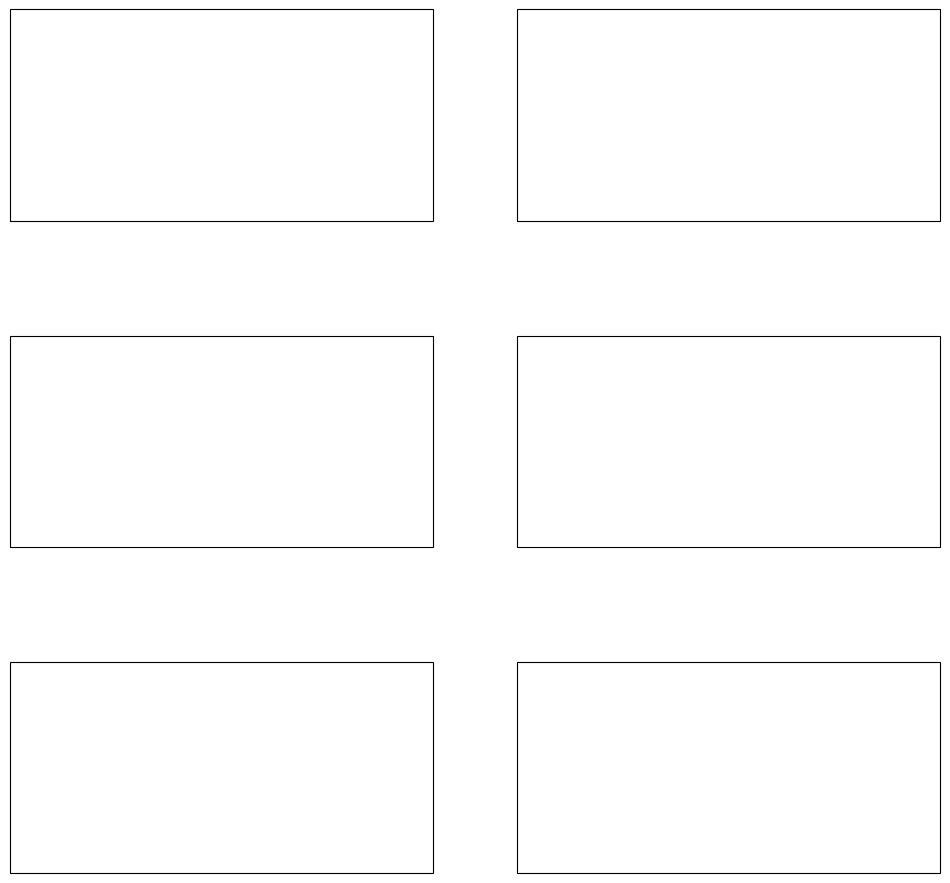

In [16]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

file_path1 ='/work/uo1451/m301158/MPI-ESM/data/test_pictrl003/'
file_path2 ='/work/uo1451/m301158/MPI-ESM/data/test_pictrl_ver2_001/'

ds1=nc.Dataset(file_path1+'dissic_nat_r192x96_185001-190012.nc')
dic_test1=ds1.variables['dissic'][:]
lon=ds1.variables['lon'][:]
lat=ds1.variables['lat'][:]
dic_nat_test1=ds1.variables['dissicnat'][:]

ds2=nc.Dataset(file_path2+'dissic_nat_r192x96_185001-190012.nc')
dic_test2=ds2.variables['dissic'][:] # time(51)*depth(40)*lat(96)*lon(192)
dic_nat_test2=ds2.variables['dissicnat'][:]

dic_test1_clim=np.mean(dic_test1,axis=0)
dic_test2_clim=np.mean(dic_test2,axis=0)
dic_nat_test1_clim=np.mean(dic_nat_test1,axis=0)
dic_nat_test2_clim=np.mean(dic_nat_test2,axis=0)
dic_diff_test1=dic_test1_clim-dic_nat_test1_clim
dic_diff_test2=dic_test2_clim-dic_nat_test2_clim

d_idx=0

#print(ds2.variables['dissic'])
#fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12),sharex=True, sharey=True)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,12), subplot_kw={'projection': ccrs.PlateCarree()})

c1 = axes[0].pcolormesh(lon, lat, dic_test1_clim[d_idx, :, :], cmap='viridis', transform=ccrs.PlateCarree())
axes[0].coastlines()
axes[0].gridlines(draw_labels=True, linestyle='--', linewidth=0.5)
axes[0].set_title('DIC_total')
plt.colorbar(c1, ax=axes[0], orientation='horizontal', pad=0.05, label='')

c2 = axes[1].pcolormesh(lon, lat, dic_nat_test1_clim[d_idx, :, :], cmap='viridis', transform=ccrs.PlateCarree())
axes[1].coastlines()
axes[1].add_feature(cfeature.BORDERS, linewidth=0.5)
axes[1].gridlines(draw_labels=True, linestyle='--', linewidth=0.5)
axes[1].set_title('DIC_nat')
plt.colorbar(c2, ax=axes[1], orientation='horizontal', pad=0.05, label='')

c3 = axes[2].pcolormesh(lon, lat, dic_diff_test1[d_idx, :, :], cmap='RdBu_r', transform=ccrs.PlateCarree())
axes[2].coastlines()
axes[2].add_feature(cfeature.BORDERS, linewidth=0.5)
axes[2].gridlines(draw_labels=True, linestyle='--', linewidth=0.5)
axes[2].set_title('DIC_diff')
plt.colorbar(c3, ax=axes[2], orientation='horizontal', pad=0.05, label='')

c4 = axes[3].pcolormesh(lon, lat, dic_test2_clim[d_idx, :, :], cmap='viridis', transform=ccrs.PlateCarree())
axes[3].coastlines()
axes[3].gridlines(draw_labels=True, linestyle='--', linewidth=0.5)
axes[3].set_title('')
plt.colorbar(c4, ax=axes[3], orientation='horizontal', pad=0.05, label='')

c5 = axes[4].pcolormesh(lon, lat, dic_nat_test2_clim[d_idx, :, :], cmap='viridis', transform=ccrs.PlateCarree())
axes[4].coastlines()
axes[4].add_feature(cfeature.BORDERS, linewidth=0.5)
axes[4].gridlines(draw_labels=True, linestyle='--', linewidth=0.5)
axes[4].set_title('')
plt.colorbar(c5, ax=axes[4], orientation='horizontal', pad=0.05, label='')

c6 = axes[5].pcolormesh(lon, lat, dic_diff_test2[d_idx, :, :], cmap='RdBu_r', transform=ccrs.PlateCarree())
axes[5].coastlines()
axes[5].add_feature(cfeature.BORDERS, linewidth=0.5)
axes[5].gridlines(draw_labels=True, linestyle='--', linewidth=0.5)
axes[5].set_title('')
plt.colorbar(c6, ax=axes[5], orientation='horizontal', pad=0.05, label='')

plt.tight_layout()
plt.show()


In [3]:
!pip install basemap

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 13.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 83.1 MB/s eta 0:00:0000:0100:01
